In [ ]:
#Practica 2 Regresión Logistica
#Autor: Jaime del Rey, Grupo 24

In [2]:
import pandas as p
import numpy as np
import matplotlib.pyplot as mp
import scipy.optimize as opt
from sklearn.preprocessing import PolynomialFeatures

In [3]:
#Read the dataset
data = p.read_csv("ex2data1.csv",sep=",",names=["Examen 1","Examen 2","Admitido"])

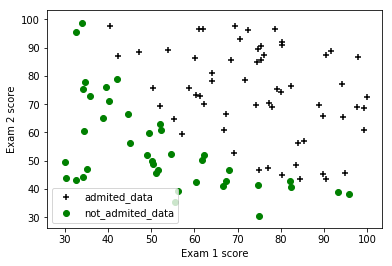

In [4]:
#Mostrar valores x e y
admited_data = data.loc[data['Admitido'] == 1]
not_admited_data = data.loc[data['Admitido'] == 0]

mp.figure()
mp.xlabel("Exam 1 score")
mp.ylabel("Exam 2 score")
mp.scatter(admited_data['Examen 1'],admited_data['Examen 2'],marker='+',c='k',label="admited_data")
mp.scatter(not_admited_data['Examen 1'],not_admited_data['Examen 2'],marker='o',c='g',label="not_admited_data")
mp.legend()

In [5]:
#Preparacion de datos para logistic regression
m = data.shape[0]
x = np.matrix(data.loc[:,['Examen 1','Examen 2']])
x = np.insert(x,0,1,axis=1)
x_T = x.T
y = np.matrix(data.loc[:,'Admitido'])
y_T = y.T
theta = np.zeros(x.shape[1])

In [6]:
#Sigmoid function

sigmoid_function = lambda a : 1 / (1 + np.vectorize(np.exp)(-a))

#Gradient function
def gradient(theta,x_T,y_T,m):
    gradient = 1/m * x_T @ (sigmoid_function(theta @ x_T).T - y_T)
    return (np.asarray(gradient).ravel())

#Cost function
def cost_function(theta,x_T,y_T,m):
    cost = -1/m * ((np.log(sigmoid_function(theta @ x_T)) @ y_T) + (np.log(1 - sigmoid_function(theta @ x_T)) @ (1 - y_T)))
    return (np.asarray(cost).ravel()[0])

In [7]:
#Calculo del valor optimo de los parametros
result = opt.fmin_tnc(func=cost_function,x0=theta,fprime=gradient,args=(x_T,y_T,m))
theta_opt = result[0]
print (theta_opt)
print(cost_function(result[0],x_T,y_T,m))



[-25.16131855   0.20623159   0.20147149]
0.20349770158947486


In [8]:
def draw_decision_boundary(x,theta,admited_data,not_admited_data):
    
    #Configure the figure and the sigmoid function

    x1_min, x1_max = x[:, 1].min(), x[:, 1].max()
    x2_min, x2_max = x[:, 2].min(), x[:, 2].max()
    xx1, xx2 = np.meshgrid(np.linspace(x1_min, x1_max),np.linspace(x2_min, x2_max))
    xtest = np.c_[np.ones((xx1.ravel().shape[0], 1)),xx1.ravel(),xx2.ravel()].T
    h = sigmoid_function(theta.dot(xtest))
    h = h.reshape(xx1.shape)
    mp.contour(xx1,xx2,h,[0.5])

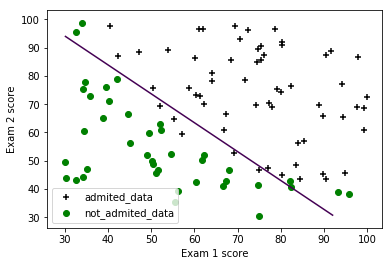

In [9]:
#Draw data
mp.figure()

mp.xlabel("Exam 1 score")
mp.ylabel("Exam 2 score")
mp.scatter(admited_data['Examen 1'],admited_data['Examen 2'],marker='+',c='k',label="admited_data")
mp.scatter(not_admited_data['Examen 1'],not_admited_data['Examen 2'],marker='o',c='g',label="not_admited_data")
mp.legend()

draw_decision_boundary(x,theta_opt,admited_data,not_admited_data)



In [10]:
#Accuracy for our logistic regression model
sigmoid_results = sigmoid_function(theta_opt * x_T).T >= 0.5
sigmoid_results = sigmoid_results.flatten()
comparition_array = sigmoid_results == y

valid_classes = np.shape(comparition_array[comparition_array == True])[1]
accuracy = valid_classes / np.shape(comparition_array)[1]
print(accuracy)


0.89


In [11]:
#Regularized Logistic Regression
#Data
data = p.read_csv("ex2data2.csv",sep=",",names=["Test1","Test2","Passed"])

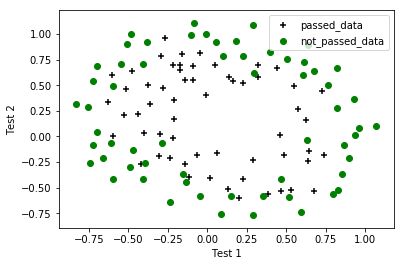

In [12]:
#Show data
passed_data = data.loc[data['Passed'] == 1]
not_passed_data = data.loc[data['Passed'] == 0]

mp.figure()
mp.xlabel("Test 1")
mp.ylabel("Test 2")
mp.scatter(passed_data['Test1'],passed_data['Test2'],marker='+',c='k',label="passed_data")
mp.scatter(not_passed_data['Test1'],not_passed_data['Test2'],marker='o',c='g',label="not_passed_data")
mp.legend()

In [13]:
#Preparacion de datos para logistic regression
m = data.shape[0]
x = np.matrix(data.loc[:,['Test1','Test2']])
#x = np.insert(x,0,1,axis=1)
x_T = x.T
y = np.matrix(data.loc[:,'Passed'])
y_T = y.T
theta = np.zeros(x.shape[1])

In [14]:
#Feature mapping

poly = PolynomialFeatures(6)
poly_x = poly.fit_transform(x)
poly_x_T = poly_x.T
theta = np.zeros(poly_x.shape[1])

In [15]:
#Sigmoid function
sigmoid_function = lambda a : 1 / (1 + np.vectorize(np.exp)(-a))

#Regularized Gradient function
def regularized_gradient(theta,x_T,y_T,m,l):
    theta = np.matrix(theta)
    regularization = (l/m) * theta.T
    regularization[0,0] = 0
    gradient = 1/m * x_T @ (sigmoid_function(theta @ x_T).T - y_T) + regularization
    return (np.asarray(gradient).ravel())

#Regularized Cost function
def regularized_cost_function(theta,x_T,y_T,m,l):
    regularization =  (l/(2*m)) * (theta @ theta.T)
    cost = (-1/m * ((np.log(sigmoid_function(theta @ x_T)) @ y_T) + (np.log(1 - sigmoid_function(theta @ x_T)) @ (1 - y_T)))) + regularization
    return (np.asarray(cost).ravel()[0])


In [16]:
#Calculo del valor optimo de los parametros
result = opt.fmin_tnc(func=regularized_cost_function,x0=theta,fprime=regularized_gradient,args=(poly_x_T,y_T,m,1))
theta_opt = result[0]


In [17]:
def draw_decision_boundary_poly(poly_x,theta_opt,poly):
    
    #Configure the figure and the sigmoid function

    x1_min, x1_max = poly_x[:, :].min(), poly_x[:, :].max()
    x2_min, x2_max = poly_x[:, :].min(), poly_x[:, :].max()
    xx1, xx2 = np.meshgrid(np.linspace(x1_min, x1_max),np.linspace(x2_min, x2_max))
    xtest = poly.fit_transform(np.c_[xx1.ravel(),xx2.ravel()]).T
    print(theta_opt)
    h = sigmoid_function(theta_opt.dot(xtest))
    h = h.reshape(xx1.shape)
    mp.contour(xx1,xx2,h,[0.5])


[ 2.49642177e-04  1.37411854e-04  2.77015468e-04 -4.35864019e-04
 -1.62449436e-04 -2.48690118e-04  3.40749990e-05 -7.16772039e-05
 -7.34921572e-05 -2.03230714e-05 -3.10561473e-04 -1.49839763e-05
 -1.31827527e-04 -4.36568873e-05 -2.29977614e-04 -3.43134046e-05
 -4.33024470e-05 -1.87924387e-05 -5.59545407e-05 -5.21233154e-05
 -9.08328404e-05 -2.10980623e-04  2.17302580e-06 -6.54198811e-05
 -8.84440483e-07 -6.91290245e-05 -1.78750801e-05 -1.85528388e-04]


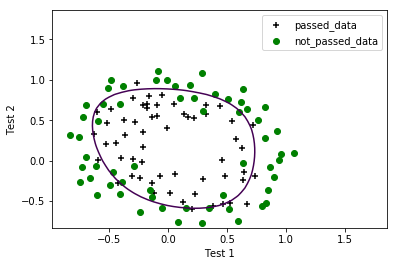

In [36]:
#Draw data
mp.figure()

mp.xlabel("Test 1")
mp.ylabel("Test 2")
mp.scatter(passed_data['Test1'],passed_data['Test2'],marker='+',c='k',label="passed_data")
mp.scatter(not_passed_data['Test1'],not_passed_data['Test2'],marker='o',c='g',label="not_passed_data")
mp.legend()

draw_decision_boundary_poly(poly_x_T, theta_opt, poly)


In [18]:
#Accuracy for our logistic regression model
sigmoid_results = sigmoid_function(theta_opt @ poly_x_T).T >= 0.5
sigmoid_results = sigmoid_results.flatten()
comparition_array = sigmoid_results == y

valid_classes = np.shape(comparition_array[comparition_array == True])[1]
accuracy = valid_classes / np.shape(comparition_array)[1]
print(accuracy)


0.8050847457627118


[ 2.94088026e-03  2.05476645e-03  3.57343440e-03 -5.53609652e-03
 -2.85383397e-03 -3.42282808e-03  9.46358037e-04 -1.18224584e-03
 -1.23738306e-03  4.34243082e-05 -3.75952133e-03 -3.27031125e-04
 -1.88294783e-03 -8.52266558e-04 -2.73297951e-03  7.14605898e-05
 -6.59531739e-04 -2.84567053e-04 -8.39003735e-04 -8.66794008e-04
 -5.62778298e-04 -2.33554411e-03  1.75901165e-05 -9.24447842e-04
 -6.19921331e-05 -9.66817114e-04 -3.68897975e-04 -1.78205856e-03]
0.8305084745762712
[ 1.93620214e-04  8.29916045e-05  1.90650377e-04 -3.17292735e-04
 -1.00170889e-04 -1.78287393e-04  7.24124849e-06 -4.64634774e-05
 -4.71876449e-05 -2.82105367e-05 -2.31413586e-04 -8.34612993e-06
 -9.10808425e-05 -2.51591586e-05 -1.76071107e-04 -4.06345644e-05
 -2.91679409e-05 -1.31290546e-05 -3.80481729e-05 -3.32938019e-05
 -8.56473257e-05 -1.63216160e-04  1.32688850e-06 -4.54034950e-05
  2.89840562e-07 -4.84158254e-05 -9.91931006e-06 -1.53402466e-04]
0.8050847457627118
[ 6.25744546e-05  1.25877805e-05  4.25595391e-05 -

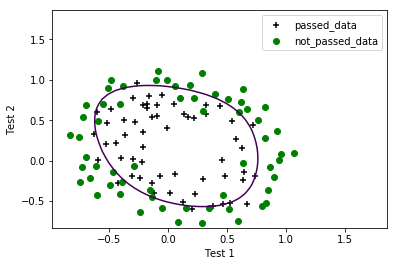

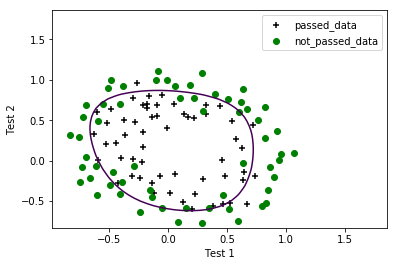

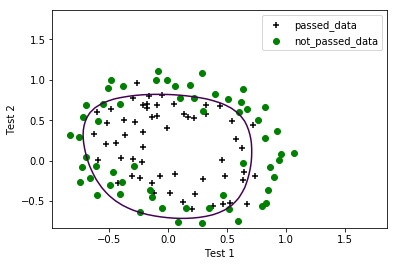

In [37]:
#Pruebas sobre varios valores de landa
#Prueba1
result = opt.fmin_tnc(func=regularized_cost_function,x0=theta,fprime=regularized_gradient,args=(poly_x_T,y_T,m,0.1))
theta_opt = result[0]
mp.figure()

mp.xlabel("Test 1")
mp.ylabel("Test 2")
mp.scatter(passed_data['Test1'],passed_data['Test2'],marker='+',c='k',label="passed_data")
mp.scatter(not_passed_data['Test1'],not_passed_data['Test2'],marker='o',c='g',label="not_passed_data")
mp.legend()

draw_decision_boundary_poly(poly_x_T, theta_opt, poly)
sigmoid_results = sigmoid_function(theta_opt @ poly_x_T).T >= 0.5
sigmoid_results = sigmoid_results.flatten()
comparition_array = sigmoid_results == y

valid_classes = np.shape(comparition_array[comparition_array == True])[1]
accuracy = valid_classes / np.shape(comparition_array)[1]
print(accuracy)
#Prueba2
result = opt.fmin_tnc(func=regularized_cost_function,x0=theta,fprime=regularized_gradient,args=(poly_x_T,y_T,m,2))
theta_opt = result[0]
mp.figure()

mp.xlabel("Test 1")
mp.ylabel("Test 2")
mp.scatter(passed_data['Test1'],passed_data['Test2'],marker='+',c='k',label="passed_data")
mp.scatter(not_passed_data['Test1'],not_passed_data['Test2'],marker='o',c='g',label="not_passed_data")
mp.legend()

draw_decision_boundary_poly(poly_x_T, theta_opt, poly)
sigmoid_results = sigmoid_function(theta_opt @ poly_x_T).T >= 0.5
sigmoid_results = sigmoid_results.flatten()
comparition_array = sigmoid_results == y

valid_classes = np.shape(comparition_array[comparition_array == True])[1]
accuracy = valid_classes / np.shape(comparition_array)[1]
print(accuracy)
#Prueba3
result = opt.fmin_tnc(func=regularized_cost_function,x0=theta,fprime=regularized_gradient,args=(poly_x_T,y_T,m,5))
theta_opt = result[0]
mp.figure()

mp.xlabel("Test 1")
mp.ylabel("Test 2")
mp.scatter(passed_data['Test1'],passed_data['Test2'],marker='+',c='k',label="passed_data")
mp.scatter(not_passed_data['Test1'],not_passed_data['Test2'],marker='o',c='g',label="not_passed_data")
mp.legend()

draw_decision_boundary_poly(poly_x_T, theta_opt, poly)
sigmoid_results = sigmoid_function(theta_opt @ poly_x_T).T >= 0.5
sigmoid_results = sigmoid_results.flatten()
comparition_array = sigmoid_results == y

valid_classes = np.shape(comparition_array[comparition_array == True])[1]
accuracy = valid_classes / np.shape(comparition_array)[1]
print(accuracy)